# TIME SERIES ANALYSIS ON THE COVID-19 (CORONAVIRUS) CASES AND DEATHS IN THE WORLD VIA A FIXED DATASET(1 JAN 2020-UP-TO-NOW) 

In [37]:
#importing relevant libraries
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import datetime
from datetime import datetime, timedelta

#For using Google Drive path & Saving data to Google Drive 
from google.colab import drive
drive.mount('drive')

In [3]:
#This part is for daily update the dataset.
today = datetime.now()
today = today.strftime('%Y-%m-%d')

yesterday = datetime.now() - timedelta(days=1)
yesterday = yesterday.strftime('%Y-%m-%d')

try: 
    url=f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{today}.xlsx'
    df = pd.read_excel(url, parse_date=[0],index_col=0)#Parsing date is for time series analysis  
    df_domain = pd.DataFrame(df)
    
except:    
    url=f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{yesterday}.xlsx'
    df = pd.read_excel(url, parse_date=[0],index_col=0)#Parsing date is for time series analysis  
    df = pd.DataFrame(df)
        
#Data Wrangling
df.columns = ['Day','Month','Year','Cases','Deaths', 'Countries_and_territories','GeoId','Country_Code','Population','Continent']

df.drop('Day',1,inplace=True)
df.drop('Month',1,inplace=True)
df.drop('Year',1,inplace=True)
df.drop('Country_Code',1,inplace=True)
df.drop('Population',1,inplace=True)
#df = df[df['GeoId'] == 'NL']
df.drop('GeoId',1,inplace=True)
df.drop(df.tail(1).index,inplace=True) # drop last row 31-12-2019
#df.set_index(pd.DatetimeIndex(df['dateRep']), inplace=True)
#df.loc[:, 'Case_Fatality_Ratio'] =df['Deaths']/df.Cases
#df_NL=df

#Seave it to a csv file to a certain path
#df.to_csv (r'C:/Users/lenovo/NLP_Homework/ECDC_data_world.csv',  index = True, header=True)
df.to_csv (r'/content/drive/My Drive/NLP proje/Our codings/Corona_Time_Series_World/ECDC_data_world.csv',  index = True, header=True)


df.head(10)

,Cases,Deaths,Countries_and_territories,Continent
dateRep,,,,
2020-05-08,171,2,Afghanistan,Asia
2020-05-07,168,9,Afghanistan,Asia
2020-05-06,330,5,Afghanistan,Asia
2020-05-05,190,5,Afghanistan,Asia
2020-05-04,235,13,Afghanistan,Asia
2020-05-03,134,4,Afghanistan,Asia
2020-05-02,164,4,Afghanistan,Asia
2020-05-01,222,4,Afghanistan,Asia
2020-04-30,122,0,Afghanistan,Asia


In [4]:
df.tail(10)

,Cases,Deaths,Countries_and_territories,Continent
dateRep,,,,
2020-03-31,0,0,Zimbabwe,Africa
2020-03-30,0,0,Zimbabwe,Africa
2020-03-29,2,0,Zimbabwe,Africa
2020-03-28,2,0,Zimbabwe,Africa
2020-03-27,0,0,Zimbabwe,Africa
2020-03-26,1,0,Zimbabwe,Africa
2020-03-25,0,0,Zimbabwe,Africa
2020-03-24,0,1,Zimbabwe,Africa
2020-03-23,0,0,Zimbabwe,Africa


In [5]:
print(df.isnull().sum().sort_values(ascending=False)) #Let's find out the number of missing values in df and sort them down in descending order.

Continent                    0
Countries_and_territories    0
Deaths                       0
Cases                        0
dtype: int64


In [6]:
type(df.index[0]) #Checking the dates whether they are timestamp or not. 
print(df.index[0])

2020-05-08 00:00:00


In [7]:
df.info() #general overview on dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15527 entries, 2020-05-08 to 2020-03-22
Data columns (total 4 columns):
Cases                        15527 non-null int64
Deaths                       15527 non-null int64
Countries_and_territories    15527 non-null object
Continent                    15527 non-null object
dtypes: int64(2), object(2)
memory usage: 606.5+ KB


In [8]:
df.describe() #general descriptive statistics overview on dataset

,Cases,Deaths
count,15527.000000,15527.000000
mean,243.389579,17.240871
std,1643.953199,126.417786
min,-2461.000000,0.000000
25%,0.000000,0.000000
50%,2.000000,0.000000
75%,33.000000,1.000000
max,48529.000000,4928.000000


In [9]:
df_World=df[today] #A snapshot for current date of  the world
df_World

,Cases,Deaths,Countries_and_territories,Continent
dateRep,,,,
2020-05-08,171,2,Afghanistan,Asia
2020-05-08,10,0,Albania,Europe
2020-05-08,185,7,Algeria,Africa
2020-05-08,1,1,Andorra,Europe
2020-05-08,0,0,Angola,Africa
2020-05-08,0,0,Anguilla,America
2020-05-08,0,0,Antigua_and_Barbuda,America
2020-05-08,163,9,Argentina,America
2020-05-08,102,2,Armenia,Europe


In [10]:
total_cases_uptonow= df['Cases'].sum()
print(f"Total Covid-19 Cases in the World:                          {total_cases_uptonow}")
total_deaths_uptonow = df['Deaths'].sum()
print(f"Total Covid-19 Deaths in the World:                         {total_deaths_uptonow}")

Total Covid-19 Cases in the World:                          3779110
Total Covid-19 Deaths in the World:                         267699


# SNAPSHOT ON JANUARY 2020

In [11]:
df_jan2020=df['2020-01'] #A snapshot for the first month, January 2020

In [12]:
total_cases_jan2020 = df_jan2020['Cases'].sum()
print(f"Total Covid-19 cases in January in the World:                            {total_cases_jan2020}")
total_deaths_jan2020 = df_jan2020['Deaths'].sum()
print(f"Total deaths due to Covid-19 cases in January in the World:              {total_deaths_jan2020}")

Total Covid-19 cases in January in the World:                            9799
Total deaths due to Covid-19 cases in January in the World:              213


In [13]:
avg_cases_jan2020 = df_jan2020['Cases'].mean()
print(f"Daily average Covid-19 cases in January in the World:                    {avg_cases_jan2020}")
avg_death_jan2020 = df_jan2020['Deaths'].mean()
print(f"Daily average deaths due to Covid-19 cases in January in the World:      {avg_death_jan2020}")

Daily average Covid-19 cases in January in the World:                    4.717862301396244
Daily average deaths due to Covid-19 cases in January in the World:      0.10255175734232065


# SNAPSHOT ON FEBRUARY 2020

In [14]:
df_feb2020=df['2020-02'] #A snapshot for the second month, February 2020

In [15]:
total_cases_feb2020 = df_feb2020['Cases'].sum()
print(f"Total Covid-19 cases in February in the World:                           {total_cases_feb2020}")
total_deaths_feb2020 = df_feb2020['Deaths'].sum()
print(f"Total deaths due to Covid-19 cases in February in the World:              {total_deaths_feb2020}")

Total Covid-19 cases in February in the World:                           75377
Total deaths due to Covid-19 cases in February in the World:              2708


In [16]:
avg_cases_feb2020=df_feb2020['Cases'].mean()
print(f"Daily average Covid-19 cases in February in the World:                    {avg_cases_feb2020}")
avg_death_feb2020=df_feb2020['Deaths'].mean()
print(f"Daily average deaths due to Covid-19 cases in February in the World:      {avg_death_feb2020}")

Daily average Covid-19 cases in February in the World:                    38.79413278435409
Daily average deaths due to Covid-19 cases in February in the World:      1.3937210499227999


# SNAPSHOT ON MARCH 2020

In [17]:
df_mar2020=df['2020-03'] #A snapshot for the third month, March 2020

In [18]:
total_cases_mar2020 = df_mar2020['Cases'].sum()
print(f"Total Covid-19 cases in March in the World:                           {total_cases_mar2020}")
total_deaths_mar2020 = df_mar2020['Deaths'].sum()
print(f"Total deaths due to Covid-19 cases in March in the World:              {total_deaths_mar2020}")

Total Covid-19 cases in March in the World:                           663242
Total deaths due to Covid-19 cases in March in the World:              33621


In [19]:
avg_cases_mar2020=df_mar2020['Cases'].mean()
print(f"Daily average Covid-19 cases in March in the World:                    {avg_cases_mar2020}")
avg_death_mar2020=df_mar2020['Deaths'].mean()
print(f"Daily average deaths due to Covid-19 cases in March in the World:      {avg_death_mar2020}")

Daily average Covid-19 cases in March in the World:                    181.56090884204764
Daily average deaths due to Covid-19 cases in March in the World:      9.203668217903093


# SNAPSHOT ON APRIL 2020

In [20]:
df_april2020=df['2020-04'] #A snapshot for the forth month, April 2020

In [21]:
total_cases_april2020 = df_april2020['Cases'].sum()
print(f"Total Covid-19 cases in April in the World:                           {total_cases_april2020}")
total_deaths_april2020 = df_april2020['Deaths'].sum()
print(f"Total deaths due to Covid-19 cases in April in the World:              {total_deaths_april2020}")

Total Covid-19 cases in April in the World:                           2354300
Total deaths due to Covid-19 cases in April in the World:              189424


In [22]:
avg_cases_april2020=df_april2020['Cases'].mean()
print(f"Daily average Covid-19 cases in April in the World:                    {avg_cases_april2020}")
avg_death_april2020=df_april2020['Deaths'].mean()
print(f"Daily average deaths due to Covid-19 cases in April in the World:      {avg_death_april2020}")

Daily average Covid-19 cases in April in the World:                    384.37551020408165
Daily average deaths due to Covid-19 cases in April in the World:      30.926367346938775


# Plots and statistics with Time Series Analysis

# WEEKLY(1JAN-Up to Date)

In [23]:
df.Deaths.resample("D").mean() #Weekly average of the Covid-19 death in 2020

dateRep
2019-12-31     0.000000
2020-01-01     0.000000
2020-01-02     0.000000
2020-01-03     0.000000
2020-01-04     0.000000
2020-01-05     0.000000
2020-01-06     0.000000
2020-01-07     0.000000
2020-01-08     0.000000
2020-01-09     0.000000
2020-01-10     0.000000
2020-01-11     0.014925
2020-01-12     0.000000
2020-01-13     0.000000
2020-01-14     0.000000
2020-01-15     0.014925
2020-01-16     0.000000
2020-01-17     0.000000
2020-01-18     0.000000
2020-01-19     0.014925
2020-01-20     0.000000
2020-01-21     0.044776
2020-01-22     0.164179
2020-01-23     0.000000
2020-01-24     0.134328
2020-01-25     0.223881
2020-01-26     0.223881
2020-01-27     0.373134
2020-01-28     0.373134
2020-01-29     0.388060
                ...    
2020-04-09    31.549020
2020-04-10    36.317073
2020-04-11    35.224390
2020-04-12    29.395122
2020-04-13    25.687805
2020-04-14    26.200000
2020-04-15    37.092683
2020-04-16    51.317073
2020-04-17    42.482927
2020-04-18    41.795122
2020-04-

In [24]:
df.Deaths.resample("W").mean() #Weekly average of the Covid-19 death in 2020

dateRep
2020-01-05     0.000000
2020-01-12     0.002132
2020-01-19     0.004264
2020-01-26     0.113006
2020-02-02     0.530917
2020-02-09     1.083156
2020-02-16     1.825160
2020-02-23     1.692964
2020-03-01     1.100213
2020-03-08     1.594737
2020-03-15     3.644407
2020-03-22     6.512849
2020-03-29    13.526038
2020-04-05    24.688985
2020-04-12    31.327031
2020-04-19    36.606969
2020-04-26    29.860028
2020-05-03    26.364893
2020-05-10    24.631376
Freq: W-SUN, Name: Deaths, dtype: float64

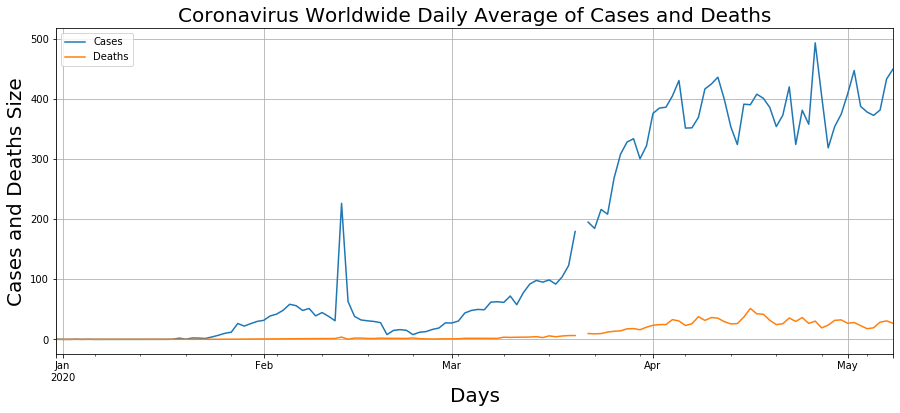

In [25]:
df[['Cases','Deaths']].resample('D').mean().plot(figsize=(15,6), grid=True,) #Line plot Daily both cases and deaths due to Covid-19
plt.title('Coronavirus Worldwide Daily Average of Cases and Deaths', size=20);
plt.xlabel('Days', size=20)
plt.ylabel('Cases and Deaths Size', size=20);

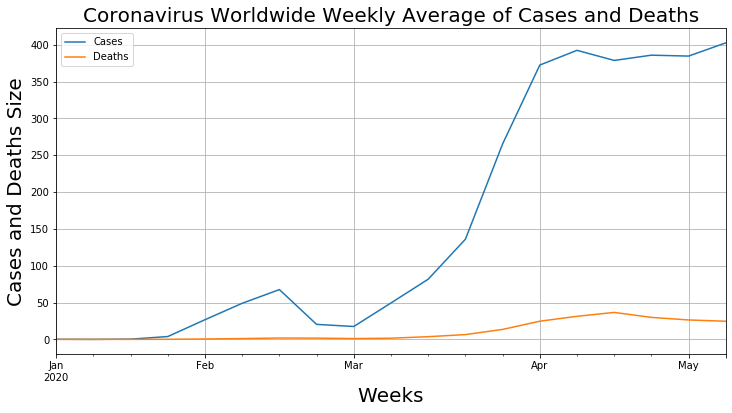

In [26]:
df[['Cases','Deaths']].resample("W").mean().plot(figsize=(12, 6), grid=True,)#Line plot weekly both cases and deaths due to Covid-19
plt.title('Coronavirus Worldwide Weekly Average of Cases and Deaths', size=20);
plt.xlabel('Weeks', size=20)
plt.ylabel('Cases and Deaths Size', size=20);

Text(0, 0.5, 'Cases and Death Size')

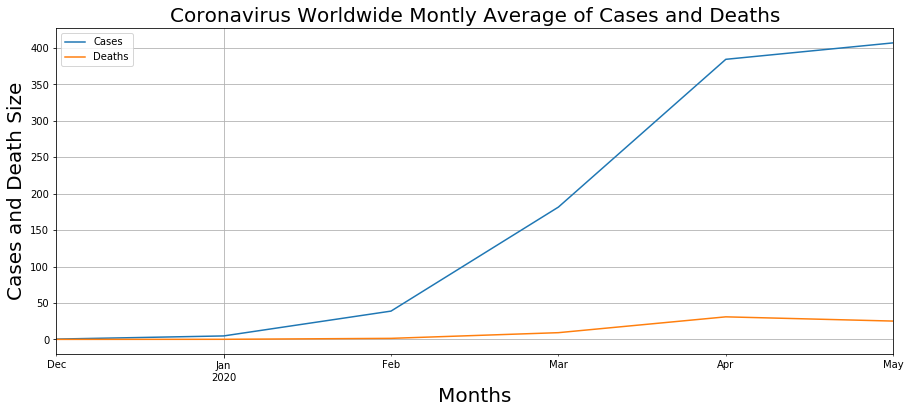

In [27]:
df[['Cases','Deaths']].resample('M').mean().plot(figsize=(15,6), grid=True,) #Line plot Montly both cases and deaths due to Covid-19
plt.title('Coronavirus Worldwide Montly Average of Cases and Deaths', size=20);
plt.xlabel('Months', size=20)
plt.ylabel('Cases and Death Size', size=20)

# March Analysis

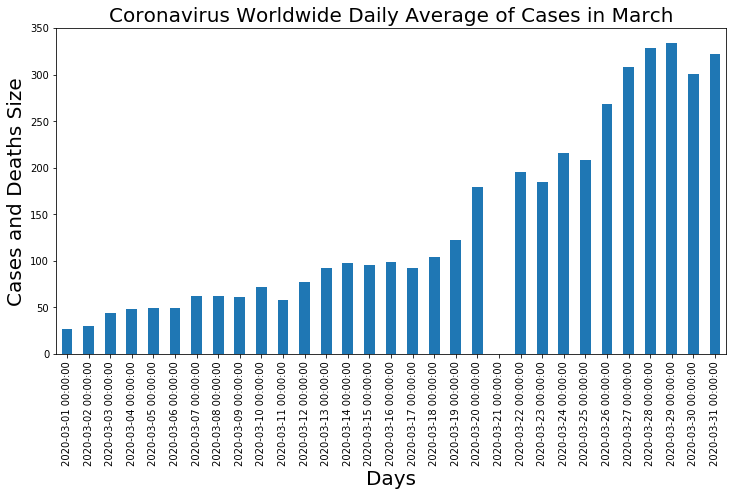

In [28]:
df['2020-03'].Cases.resample('D').mean().plot(kind='bar',figsize=(12, 6)) #Daily basis just cases in bar plot in March 2020
plt.title('Coronavirus Worldwide Daily Average of Cases in March', size=20)
plt.xlabel('Days', size=20)
plt.ylabel('Cases and Deaths Size', size=20);

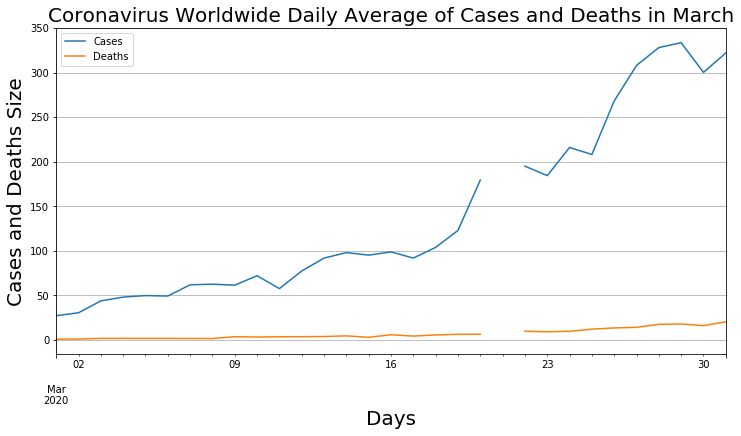

In [29]:
df['2020-03'].resample('D').mean().plot(figsize=(12, 6), grid=True,)#Daily basis both cases and deaths in bar plot in March 2020
plt.title('Coronavirus Worldwide Daily Average of Cases and Deaths in March', size=20);
plt.xlabel('Days', size=20)
plt.ylabel('Cases and Deaths Size', size=20);

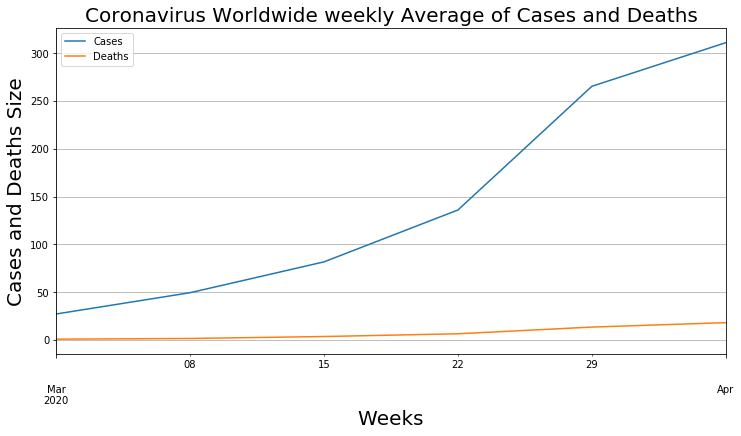

In [30]:
df['2020-03'].resample('W').mean().plot(figsize=(12, 6), grid=True,) #Weekly basis both cases and deaths in line plot in March 2020
plt.title('Coronavirus Worldwide weekly Average of Cases and Deaths', size=20)
plt.xlabel('Weeks', size=20)
plt.ylabel('Cases and Deaths Size', size=20);

#  April Analysis

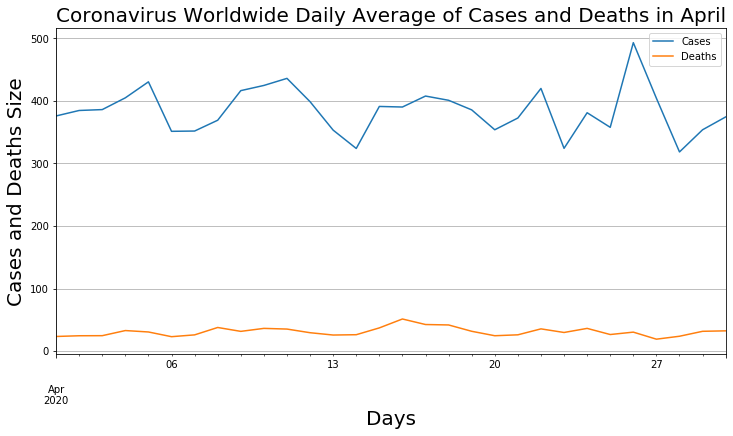

In [31]:
df['2020-04'].resample('D').mean().plot(figsize=(12, 6), grid=True,) ##Daily basis cases and deaths in line plot in April 2020
plt.title('Coronavirus Worldwide Daily Average of Cases and Deaths in April', size=20)
plt.xlabel('Days', size=20)
plt.ylabel('Cases and Deaths Size', size=20);

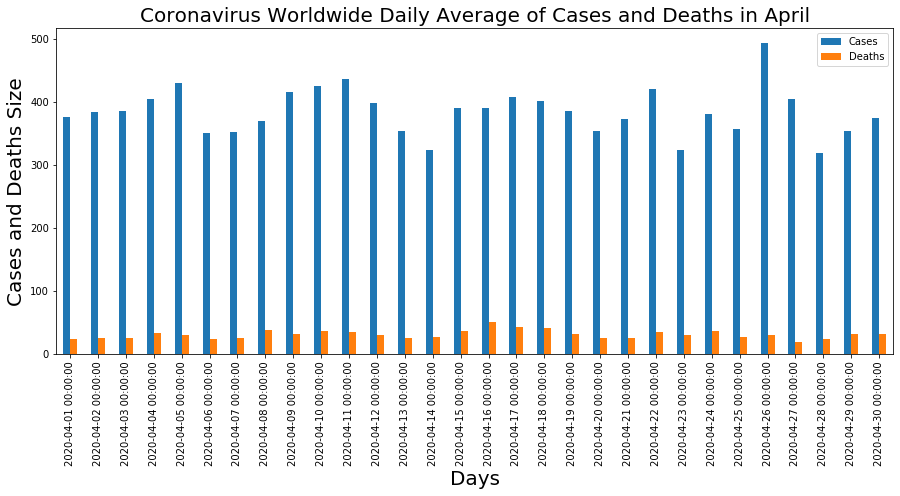

In [32]:
df['2020-04'].resample('D').mean().plot(kind='bar',figsize=(15, 6)) #Daily basis cases and deaths in bar plot in April 2020
plt.title('Coronavirus Worldwide Daily Average of Cases and Deaths in April', size=20)
plt.xlabel('Days', size=20)
plt.ylabel('Cases and Deaths Size', size=20);

# May Analysis

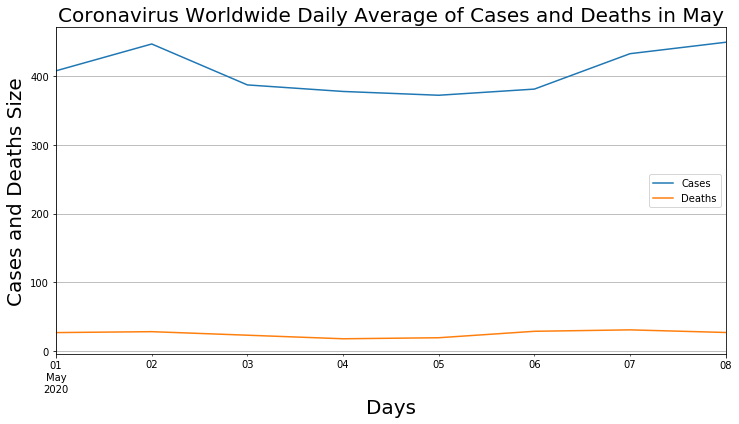

In [33]:
df['2020-05'].resample('D').mean().plot(figsize=(12, 6), grid=True,) ##Daily basis cases and deaths in line plot in May 2020
plt.title('Coronavirus Worldwide Daily Average of Cases and Deaths in May', size=20)
plt.xlabel('Days', size=20)
plt.ylabel('Cases and Deaths Size', size=20);

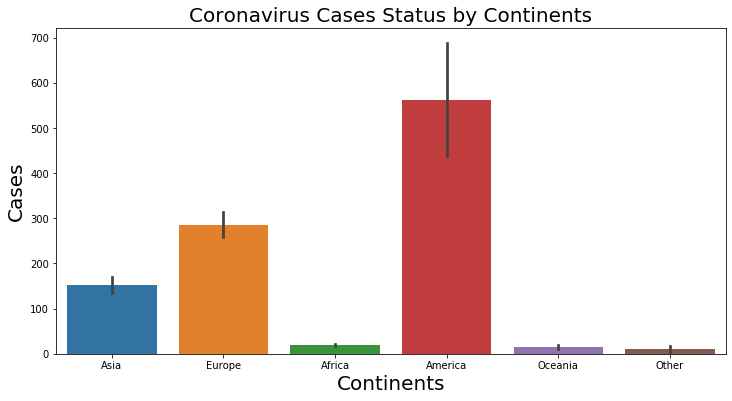

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x='Continent',y="Cases",data=df);
plt.title('Coronavirus Cases Status by Continents', size=20);
plt.xlabel('Continents', size=20)
plt.ylabel('Cases', size=20);

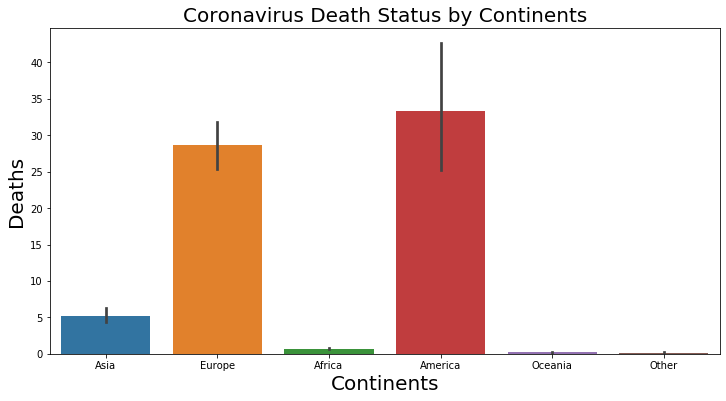

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x='Continent',y="Deaths",data=df);
plt.title('Coronavirus Death Status by Continents', size=20);
plt.xlabel('Continents', size=20)
plt.ylabel('Deaths', size=20);

In [36]:
%%html
<iframe src= "https://who.maps.arcgis.com/apps/opsdashboard/index.html#/ead3c6475654481ca51c248d52ab9c61?:display_count=y&:origin=viz_share_link" width="1400" height="1000">
</iframe>